In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ws_price = pd.read_csv('national_wholesale_price.csv', encoding = "ISO-8859-1", engine='python')
ws_price.head()

,YEAR,MONTH,COMMODITY,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
0,2008,JANUARY,MAIZE,100,13.694
1,2008,FEBRUARY,MAIZE,100,13.066
2,2008,MARCH,MAIZE,100,14.043
3,2008,APRIL,MAIZE,100,14.947
4,2008,MAY,MAIZE,100,14.808


In [4]:
ws_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                720 non-null    int64  
 1   MONTH               720 non-null    object 
 2   COMMODITY           720 non-null    object 
 3   WEIGHT, KG PER BAG  720 non-null    int64  
 4    PRICE, ¢ GH        720 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 28.2+ KB


As shown above, there are no null values.

In [5]:
ws_price.describe()

,YEAR,"WEIGHT, KG PER BAG","PRICE, ¢ GH"
count,720.000000,720.000000,720.000000
mean,2012.491667,123.833333,113.982091
std,2.871361,56.759258,162.115749
min,2008.000000,91.000000,0.007000
25%,2010.000000,93.000000,15.141000
50%,2012.500000,100.000000,52.390000
75%,2015.000000,109.000000,140.122500
max,2017.000000,250.000000,920.550000


In [6]:
ws_price.columns

Index(['YEAR', 'MONTH', 'COMMODITY', 'WEIGHT, KG PER BAG', ' PRICE, ¢ GH'], dtype='object')

# Univariate Analysis

### Commodity Analysis

In [7]:
ws_price.COMMODITY.value_counts()

MAIZE         120
MILLET        120
LOCAL RICE    120
SORGHUM       120
YAM           120
COCOYAM       120
Name: COMMODITY, dtype: int64

There are equal amounts of every commodity.

### Weight Analysis

In [8]:
ws_price['WEIGHT, KG PER BAG'].value_counts()

100    240
93     120
109    120
250    120
91     120
Name: WEIGHT, KG PER BAG, dtype: int64

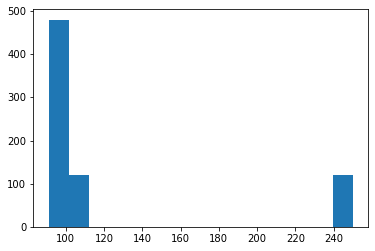

In [9]:
plt.hist(ws_price['WEIGHT, KG PER BAG'], bins=15)
plt.show()

In [10]:
ws_price['WEIGHT, KG PER BAG'].describe()

count    720.000000
mean     123.833333
std       56.759258
min       91.000000
25%       93.000000
50%      100.000000
75%      109.000000
max      250.000000
Name: WEIGHT, KG PER BAG, dtype: float64

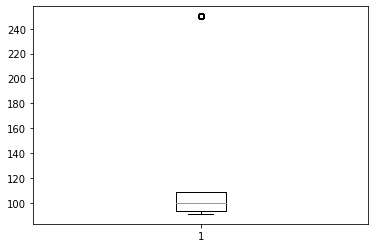

In [11]:
plt.boxplot(ws_price['WEIGHT, KG PER BAG'])
plt.show()

In [12]:
weight_first_quartile =  93.000000
weight_second_quartile = 100.000000
weight_third_quartile =  109.000000
weight_IQR = weight_third_quartile - weight_first_quartile
weight_outlier_range = weight_third_quartile + (1.5 * weight_IQR)
print(weight_outlier_range)

133.0


In [13]:
len(ws_price.loc[ws_price['WEIGHT, KG PER BAG'] < weight_second_quartile])

240

In [14]:
len(ws_price.loc[ws_price['WEIGHT, KG PER BAG'] > weight_outlier_range])

120

240(33.3%) commodities have their weight to be less than the median weight. The remaining 66.7% have higher weights and this forms majority of the commodities.  

### Month Analysis

In [15]:
ws_price.MONTH.value_counts()

JANUARY      60
FEBRUARY     60
MARCH        60
APRIL        60
MAY          60
JUNE         60
JULY         60
AUGUST       60
SEPTEMBER    60
OCTOBER      60
NOVEMBER     60
DECEMBER     60
Name: MONTH, dtype: int64

### Year Analysis

In [16]:
ws_price.YEAR.value_counts()

2013    78
2008    72
2009    72
2010    72
2011    72
2012    72
2015    72
2016    72
2017    72
2014    66
Name: YEAR, dtype: int64

In [17]:
ws_price.YEAR.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

### Price Analysis

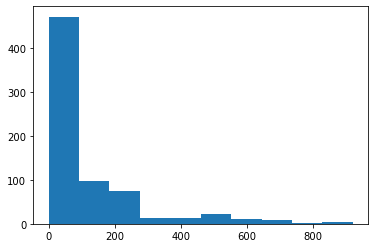

In [18]:
plt.hist(ws_price[' PRICE, ¢ GH'])
plt.show()

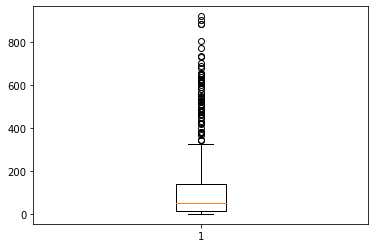

In [19]:
plt.boxplot(ws_price[' PRICE, ¢ GH'])
plt.show()

In [20]:
ws_price[' PRICE, ¢ GH'].describe()

count    720.000000
mean     113.982091
std      162.115749
min        0.007000
25%       15.141000
50%       52.390000
75%      140.122500
max      920.550000
Name:  PRICE, ¢ GH, dtype: float64

In [21]:
price_first_quartile = 15.141000
price_second_quartile = 52.390000
price_third_quartile = 140.122500
price_IQR = price_third_quartile - price_first_quartile
price_outlier_range = price_third_quartile + (1.5 * price_IQR)
print(price_outlier_range)

327.59475


In [22]:
len(ws_price.loc[ws_price[' PRICE, ¢ GH'] < price_second_quartile])

360

In [23]:
len(ws_price.loc[ws_price[' PRICE, ¢ GH'] > price_outlier_range])

66

360 commodities(50%) have their prices to be below the median price. The 66 commodities(9.2%) lying outside the outlier range are extremely overpriced. 41% commodities are priced higher than the lower commodities.

# Multivariate Analysis

In [24]:
ws_price.COMMODITY.unique()

array(['MAIZE', 'MILLET', 'LOCAL RICE', 'SORGHUM', 'YAM', 'COCOYAM'],
      dtype=object)

In [51]:
ws_price.groupby(['COMMODITY'])[' PRICE, ¢ GH'].sum().sort_values(ascending = False).keys()

Index(['YAM', 'SORGHUM', 'COCOYAM', 'LOCAL RICE', 'MAIZE', 'MILLET'], dtype='object', name='COMMODITY')

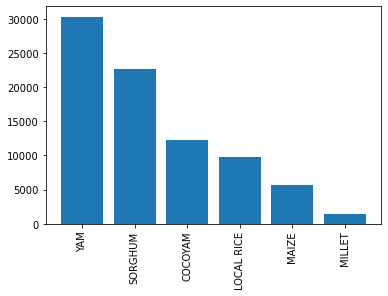

In [36]:
commodity = ['YAM', 'SORGHUM', 'COCOYAM', 'LOCAL RICE', 'MAIZE', 'MILLET']
plt.bar(commodity,ws_price.groupby(['COMMODITY'])[' PRICE, ¢ GH'].sum().sort_values(ascending = False))
plt.xticks(rotation=90)
plt.show()

In [41]:
ws_price.groupby(['COMMODITY'])['WEIGHT, KG PER BAG'].sum().sort_values(ascending = False).keys()

Index(['YAM', 'SORGHUM', 'LOCAL RICE', 'MAIZE', 'MILLET', 'COCOYAM'], dtype='object', name='COMMODITY')

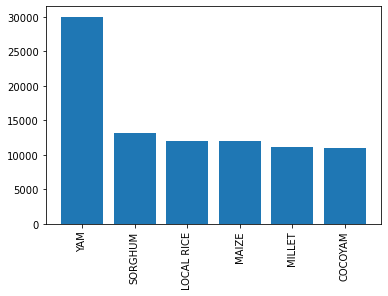

In [42]:
commodity = ['YAM', 'SORGHUM', 'LOCAL RICE', 'MAIZE', 'MILLET', 'COCOYAM']
plt.bar(commodity, ws_price.groupby(['COMMODITY'])['WEIGHT, KG PER BAG'].sum().sort_values(ascending = False))
plt.xticks(rotation=90)
plt.show()

Yam  & sorghum are the only commodities that have proportional weights and prices and have the highest sum prices with yam having the highest sum weight. Maize and millet have the lowest sum prices and relatively low sum weights. Cocoyam has the lowest sum weight. 

In [27]:
ws_price.columns

Index(['YEAR', 'MONTH', 'COMMODITY', 'WEIGHT, KG PER BAG', ' PRICE, ¢ GH'], dtype='object')

In [52]:
ws_price.groupby(['YEAR'])['COMMODITY',' PRICE, ¢ GH','MONTH'].max()

C:\Users\Eunice\AppData\Local\Temp/ipykernel_11716/1648872853.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ws_price.groupby(['YEAR'])['COMMODITY',' PRICE, ¢ GH','MONTH'].max()


,COMMODITY,"PRICE, ¢ GH",MONTH
YEAR,,,
2008,YAM,689.87,SEPTEMBER
2009,YAM,920.55,SEPTEMBER
2010,YAM,884.20,SEPTEMBER
2011,YAM,202.10,SEPTEMBER
2012,YAM,280.46,SEPTEMBER
2013,YAM,297.40,SEPTEMBER
2014,YAM,344.45,SEPTEMBER
2015,YAM,378.35,SEPTEMBER
2016,YAM,524.89,SEPTEMBER


In [29]:
ws_price.groupby(['YEAR'])['COMMODITY',' PRICE, ¢ GH','MONTH'].min()

C:\Users\Eunice\AppData\Local\Temp/ipykernel_11716/2331709662.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ws_price.groupby(['YEAR'])['COMMODITY',' PRICE, ¢ GH','MONTH'].min()


,COMMODITY,"PRICE, ¢ GH",MONTH
YEAR,,,
2008,COCOYAM,0.131,APRIL
2009,COCOYAM,3.317,APRIL
2010,COCOYAM,4.382,APRIL
2011,COCOYAM,0.007,APRIL
2012,COCOYAM,0.010,APRIL
2013,COCOYAM,0.008,APRIL
2014,COCOYAM,0.010,APRIL
2015,COCOYAM,0.010,APRIL
2016,COCOYAM,0.010,APRIL


From 2008-2017, in the month September of each year, Yam dominated the market with the highest price and Cocoyam had the lowest prices compared to the the others especially in the month April.

In [30]:
ws_price.YEAR.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

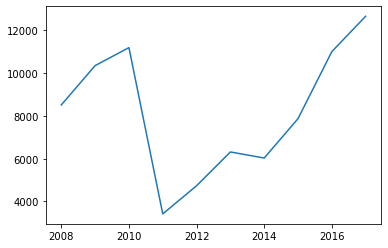

In [54]:
years = np.array([2008, 2009, 2010, 2011, 2012, 2013,2014, 2015, 2016, 2017])
plt.plot(years,ws_price.groupby(['YEAR'])[' PRICE, ¢ GH'].sum())
plt.show()

From 2010 to 2011, the general price of all commodities experienced a huge decline but quickly went back up as the years progressed.